In [1]:
import pandas as pd
import os

# Load label file
label_df = pd.read_excel('../Data/wax/data labels anna - simple.xlsx')

print(label_df.head())

   code  month   ID  optimality score  abnormal movements 1 normal 0  \
0  1023      0  180                 9                            1.0   
1  1023      1  195                14                            1.0   
2  1023      2  197                26                            1.0   
3  1023      3  206                11                            1.0   
4  1023      4  208                13                            1.0   

   AIMS percentile code  
0                     1  
1                   999  
2                     1  
3                     2  
4                     1  


processing instance 0
File not found for instance 0
processing instance 1
RA rows: 109137
LA rows: 109137
RW rows: 109137
LW rows: 109137
Minimum number of rows: 109137
First column is the same for each df
   Time   AccXRA   AccYRA   AccZRA  GyrXRA  GyrYRA  GyrZRA  MagXRA    MagYRA  \
0  0.01  0.01172 -0.00098  1.00000    0.00    2.03   -2.66   -13.3  72.90000   
1  0.02  0.01172 -0.00391  1.00000    0.00    2.03   -5.53   -13.3  86.90000   
2  0.03  0.01074 -0.00488  1.00000    0.14    2.03   -5.53   -11.5  87.20001   
3  0.04  0.00781 -0.00488  1.00000    0.21    1.96   -5.81   -11.5  87.30000   
4  0.05  0.00391 -0.00488  0.99902    0.14    1.96   -5.81   -12.2  87.40000   

   MagZRA  ...     MagZRW   AccXLW   AccYLW   AccZLW  GyrXLW  GyrYLW  GyrZLW  \
0     0.0  ...  264.20001 -0.02051  0.01269  1.00879    0.00    7.98   -8.68   
1    -5.9  ...  307.70001 -0.02148  0.01465  1.00879    6.72    8.26   -8.68   
2    -5.9  ...  315.00000 -0.02441  0.01660  1.00684    6.72    8.19   -8

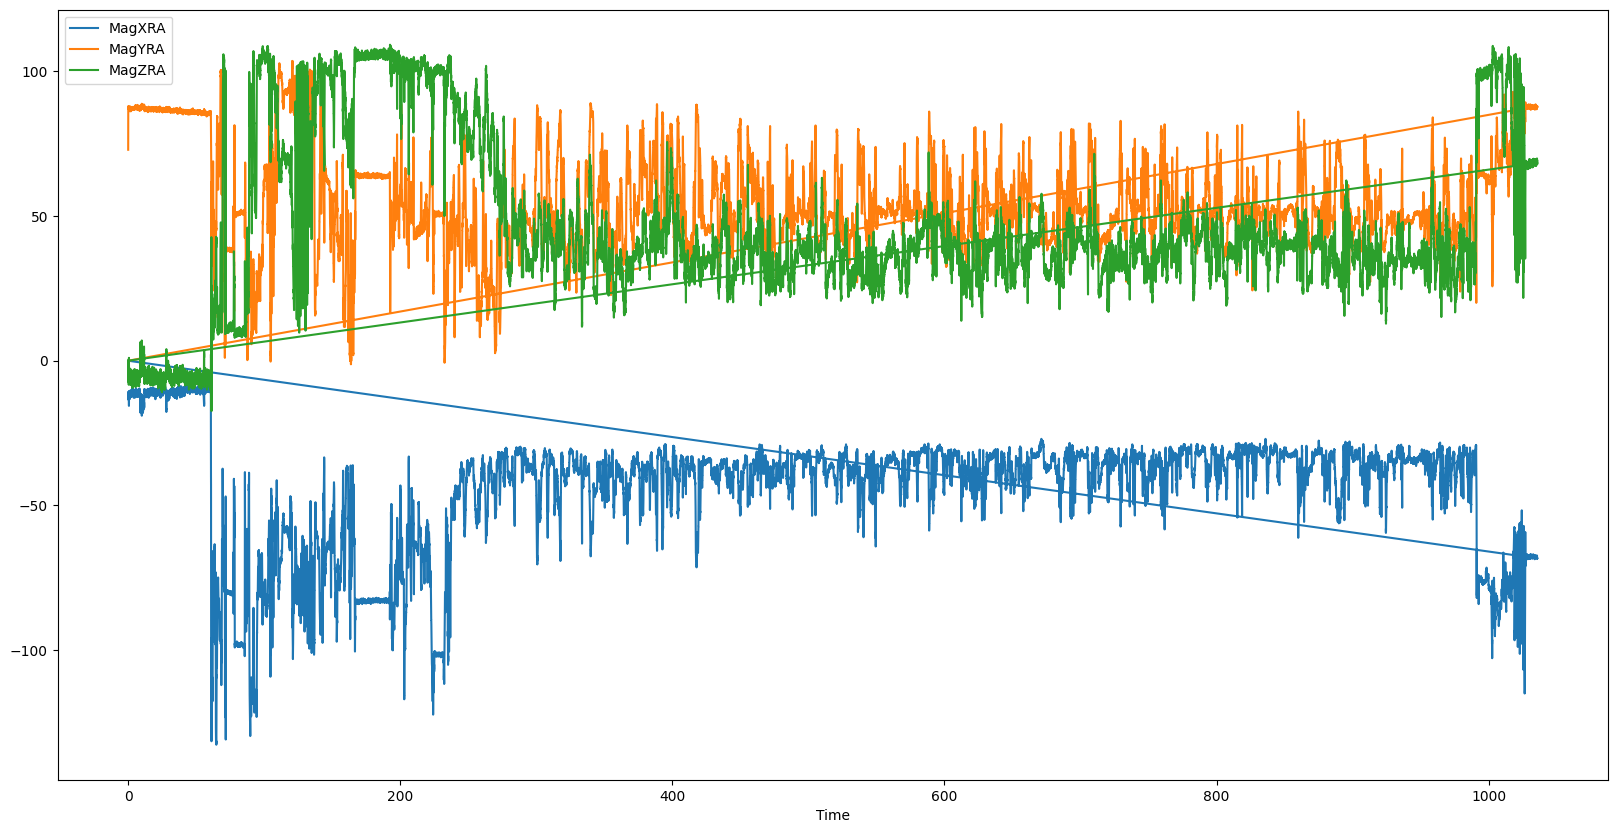

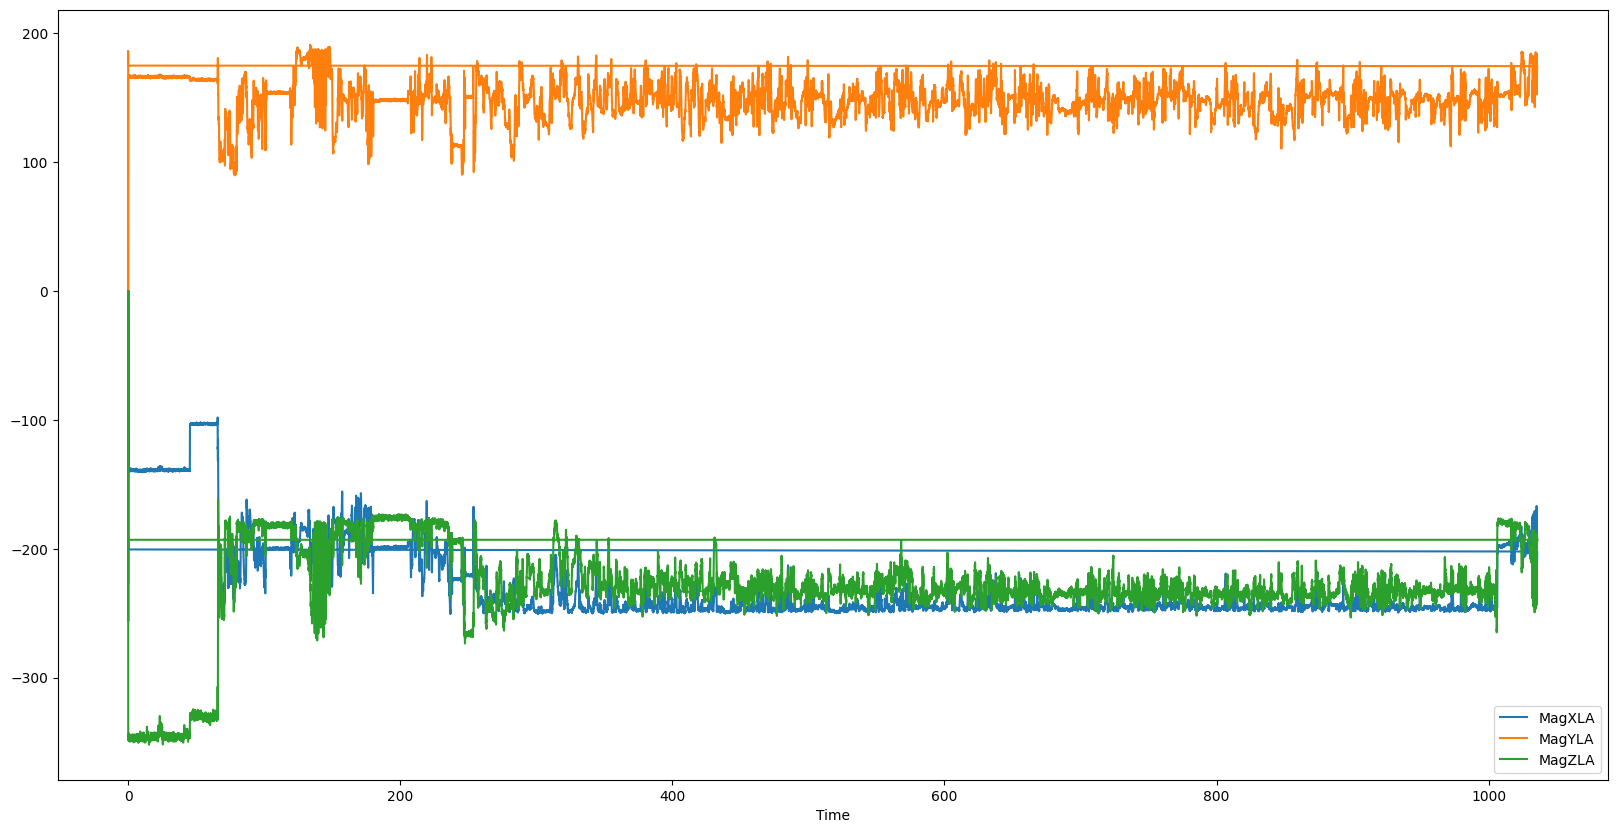

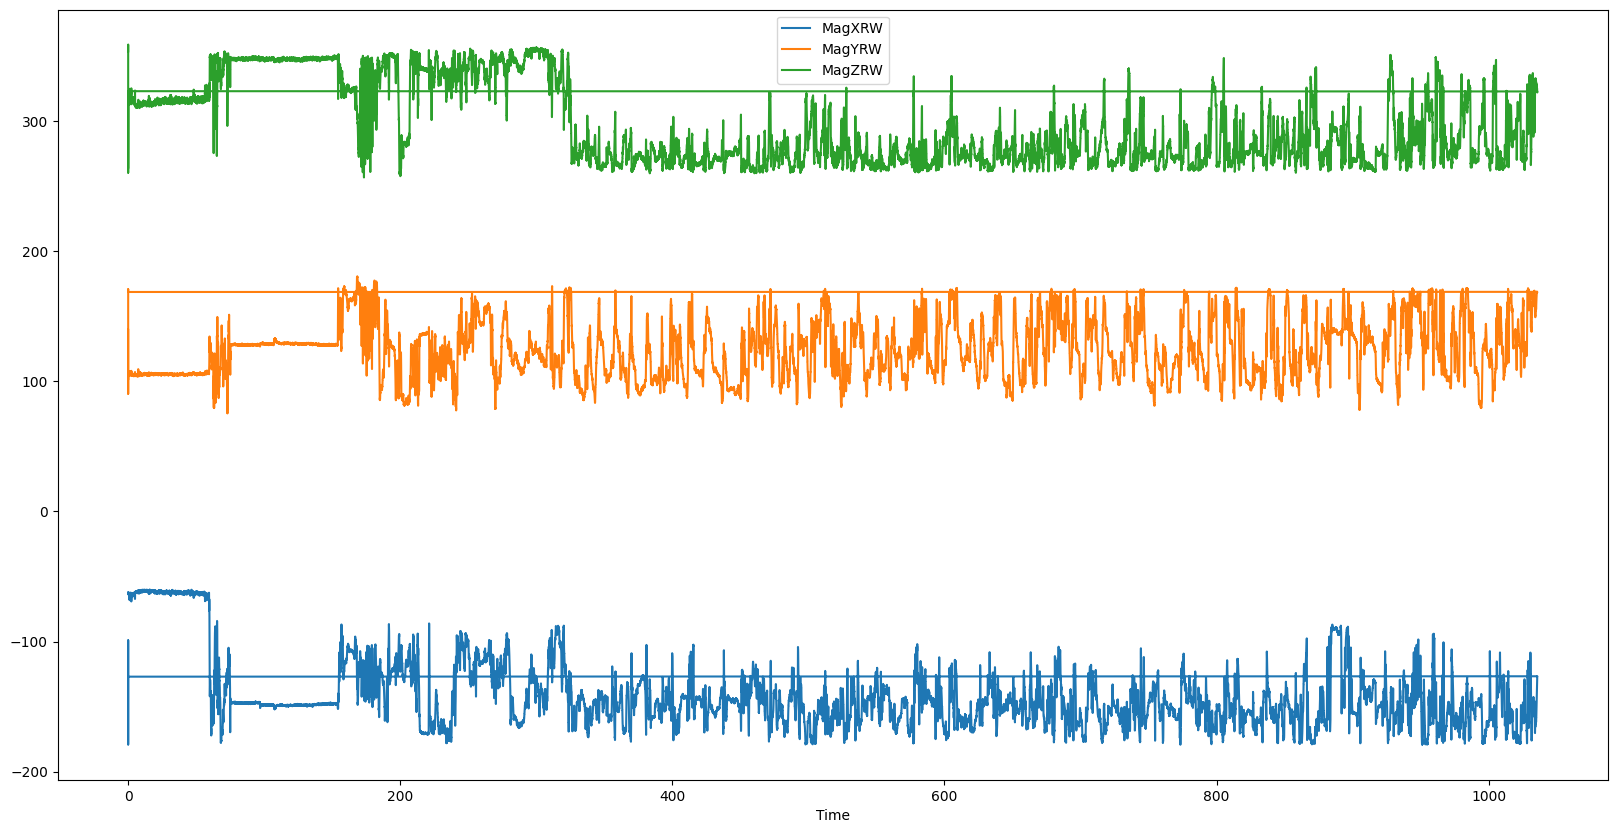

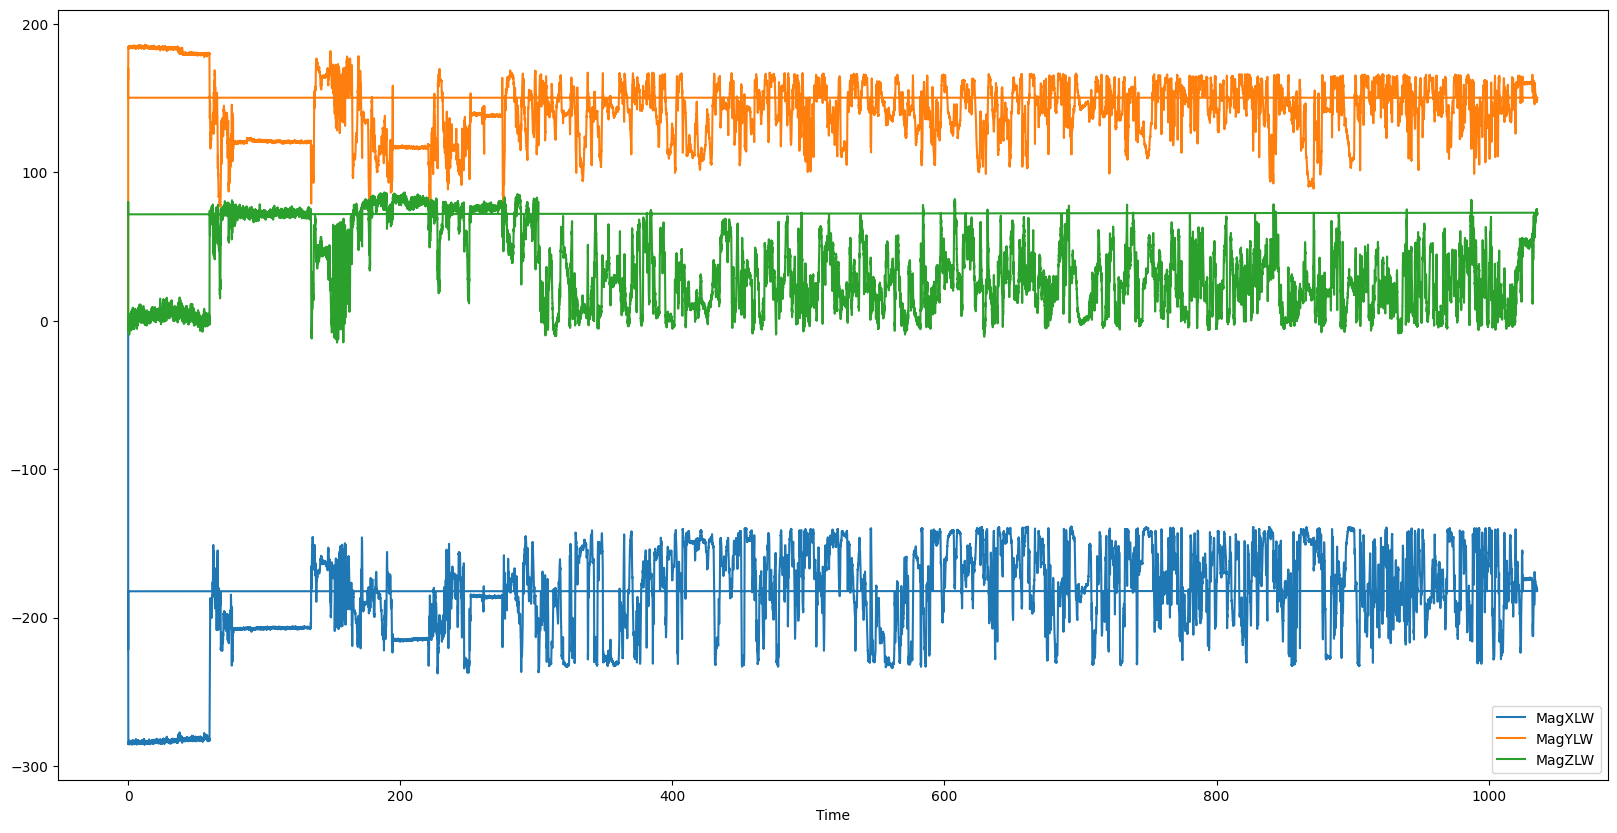

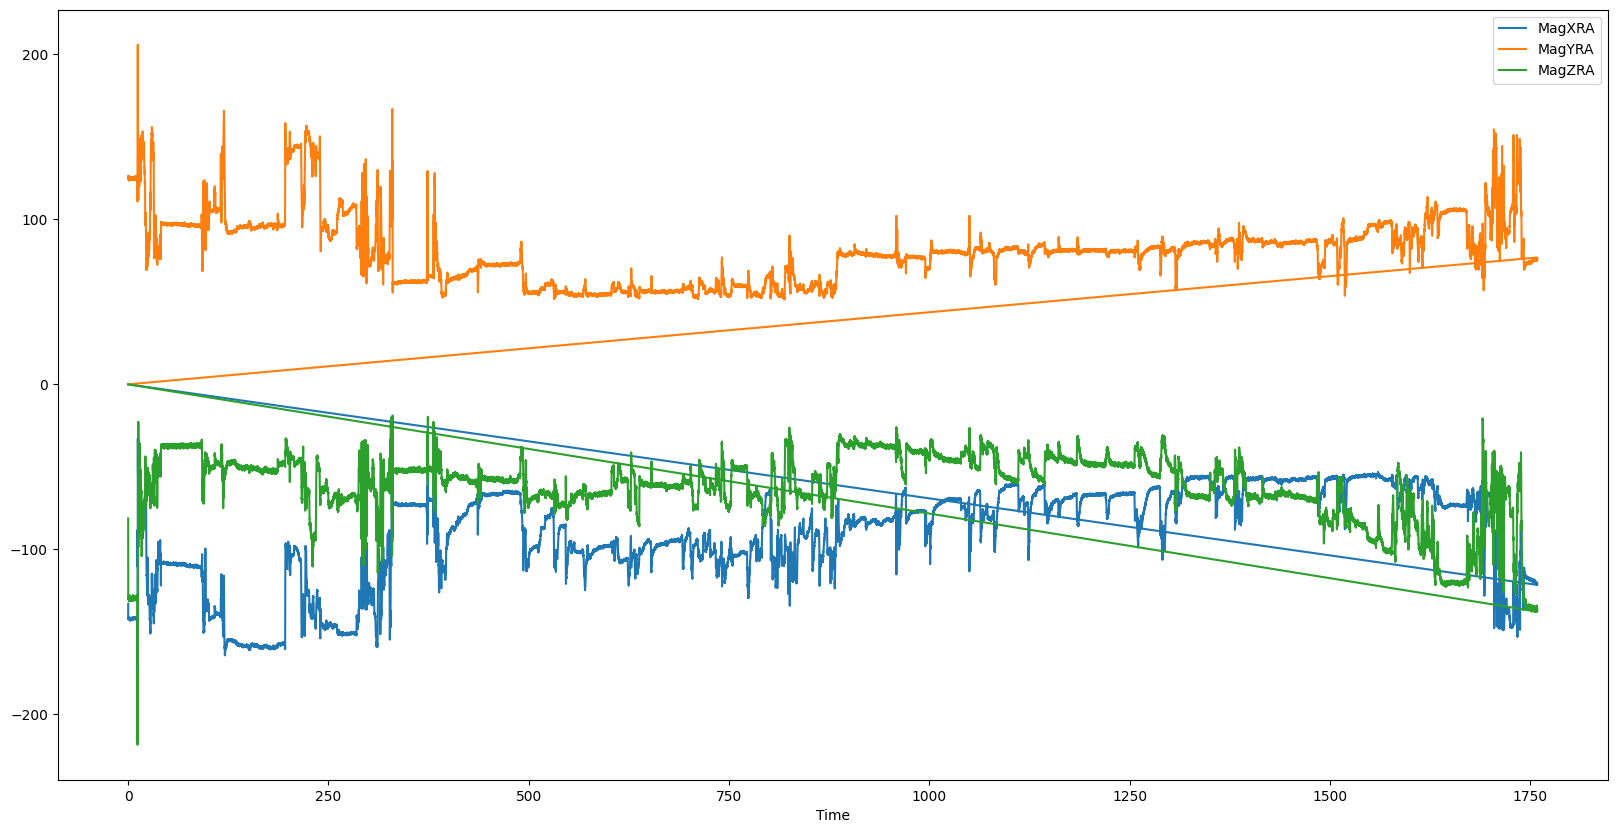

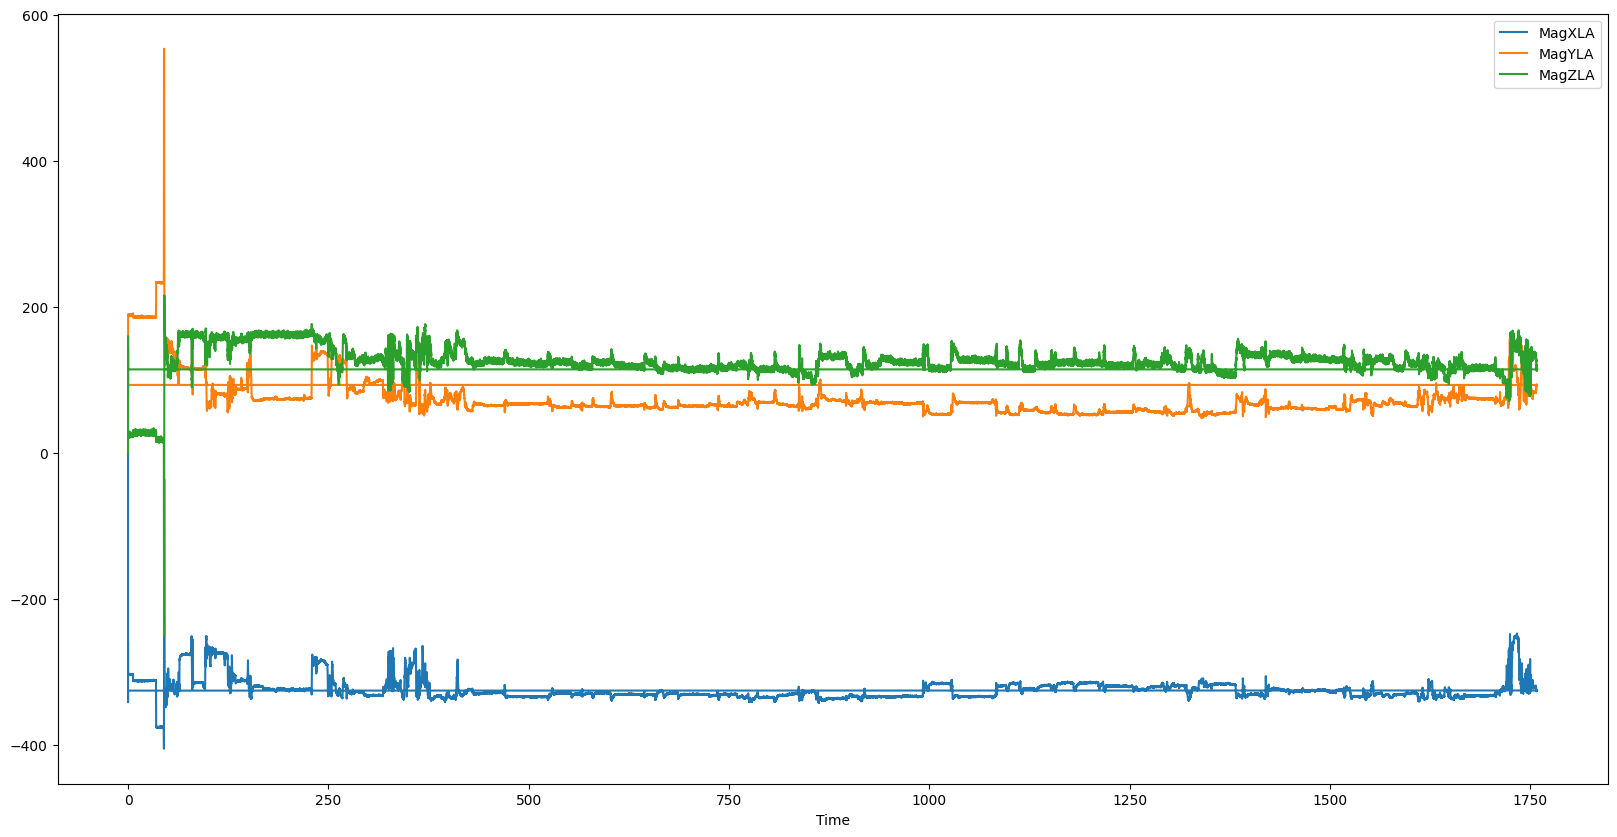

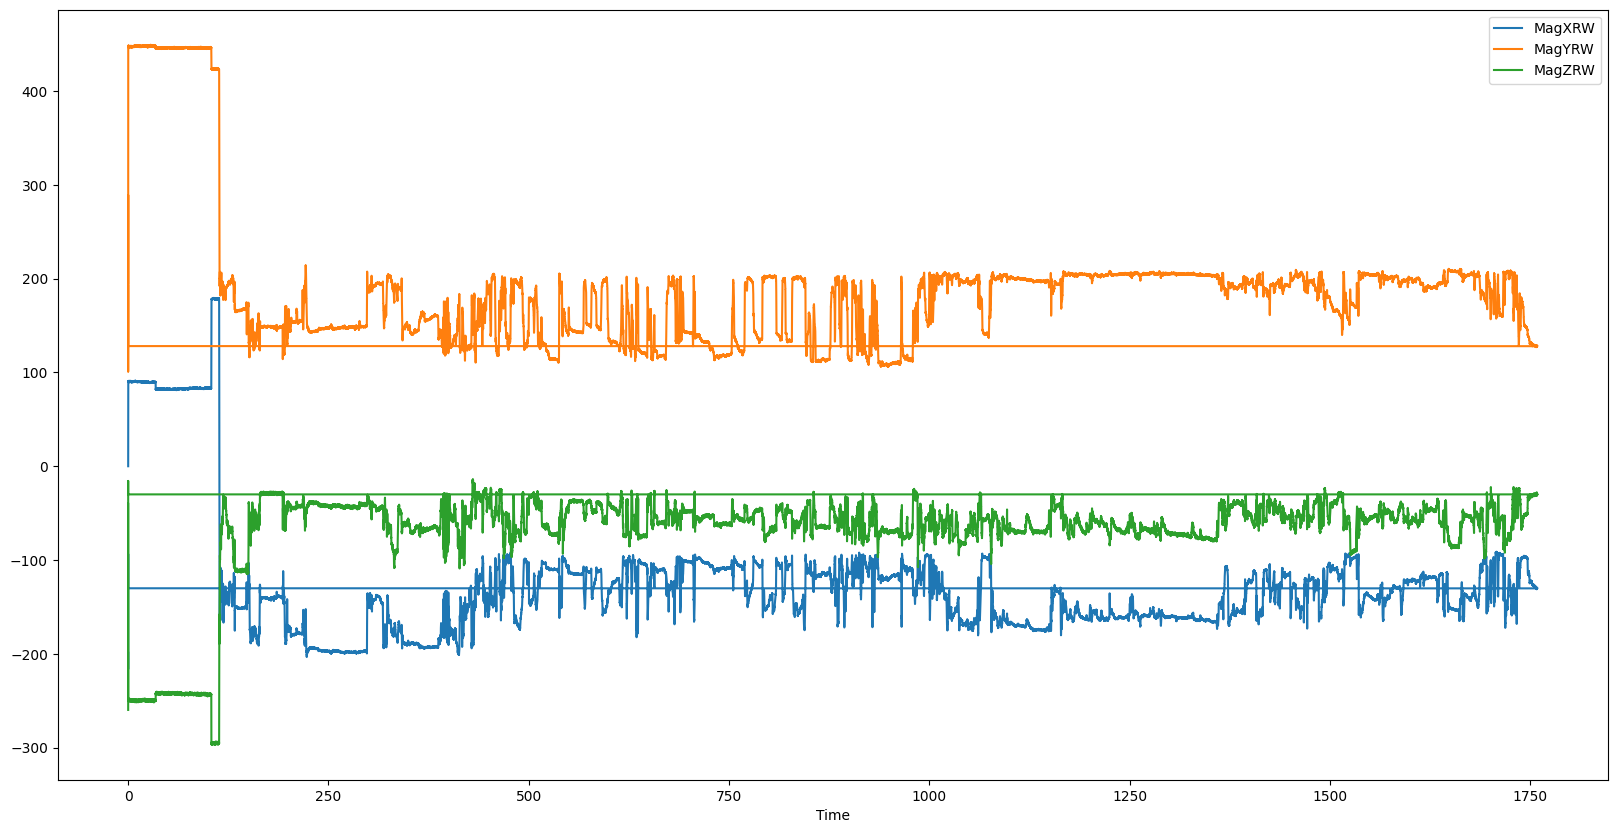

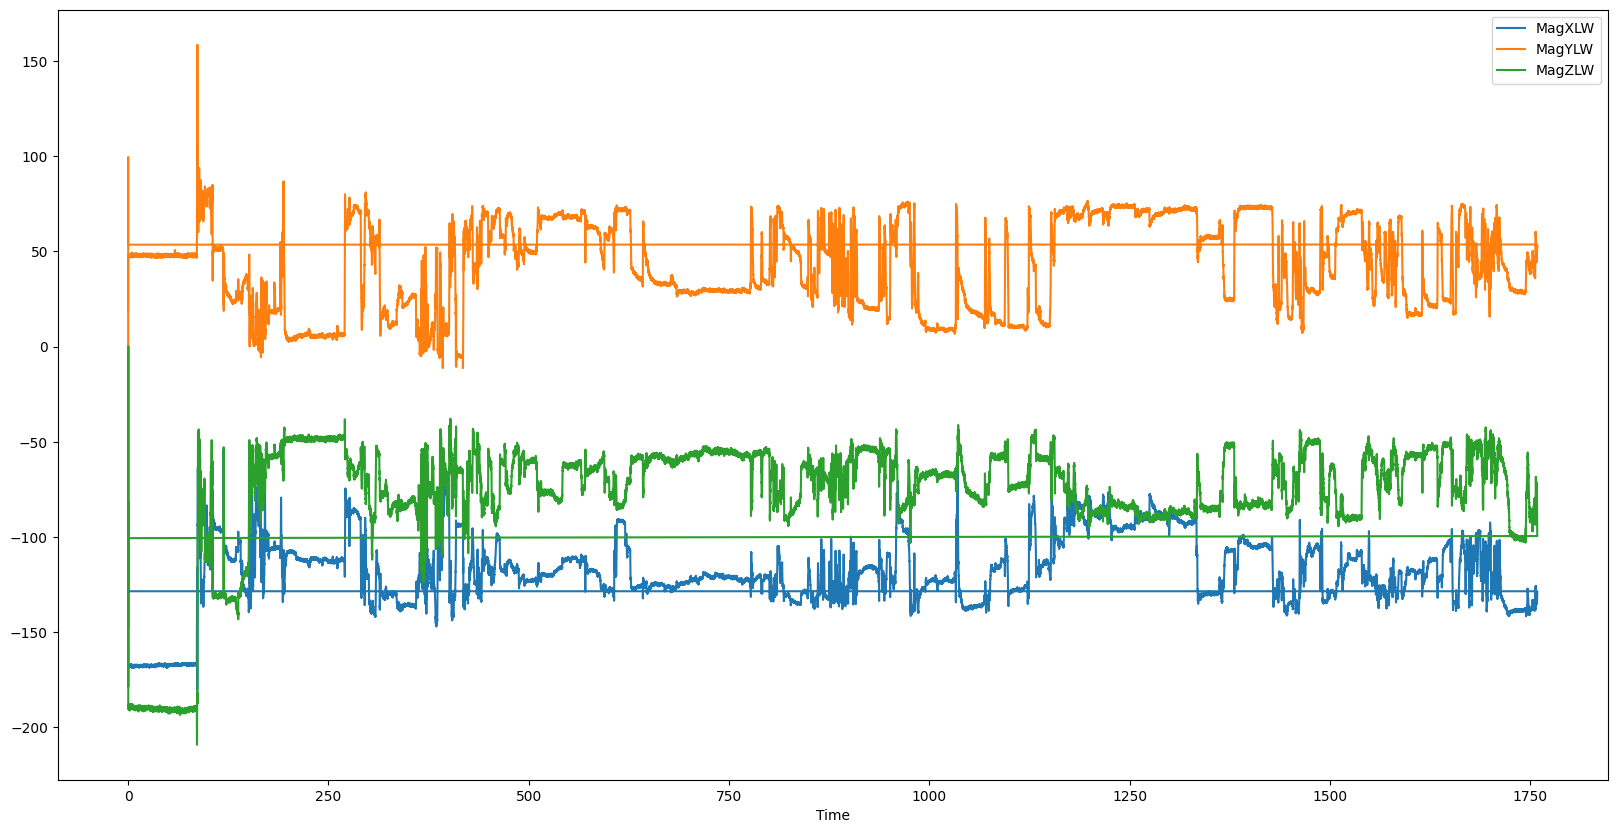

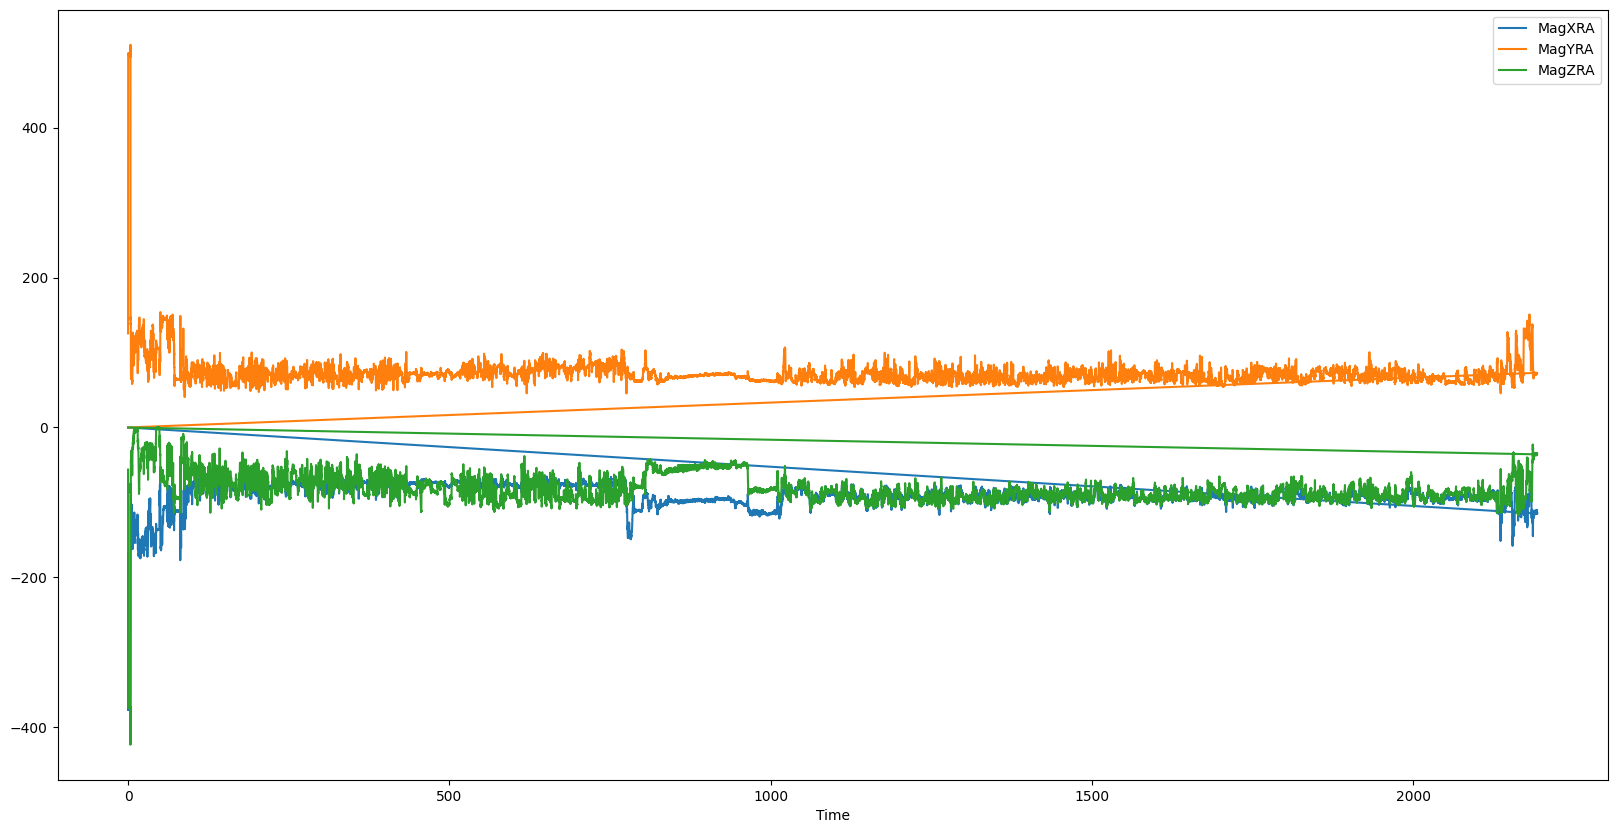

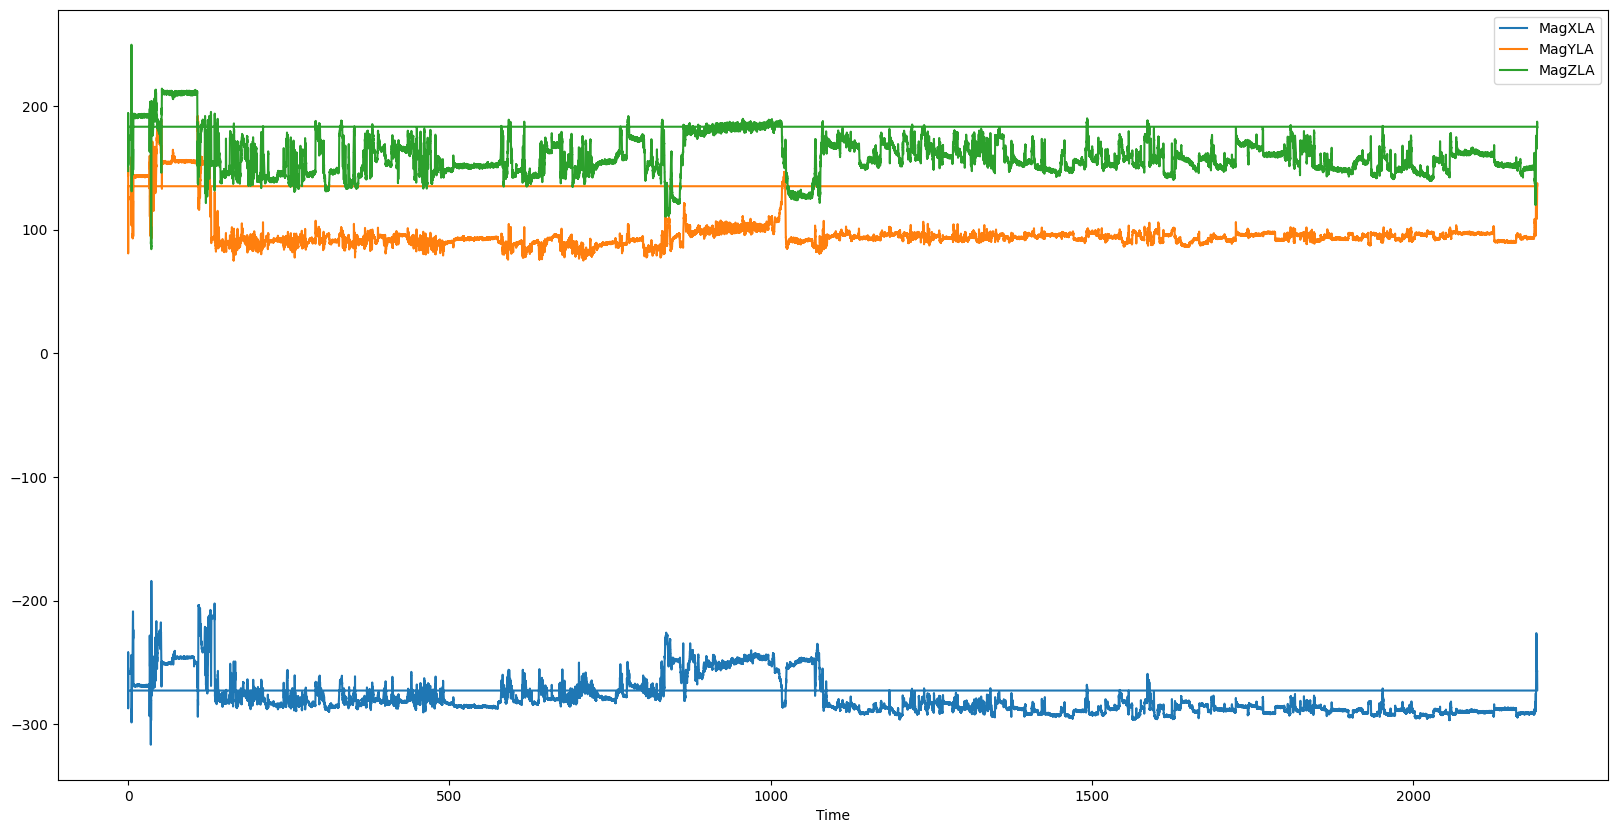

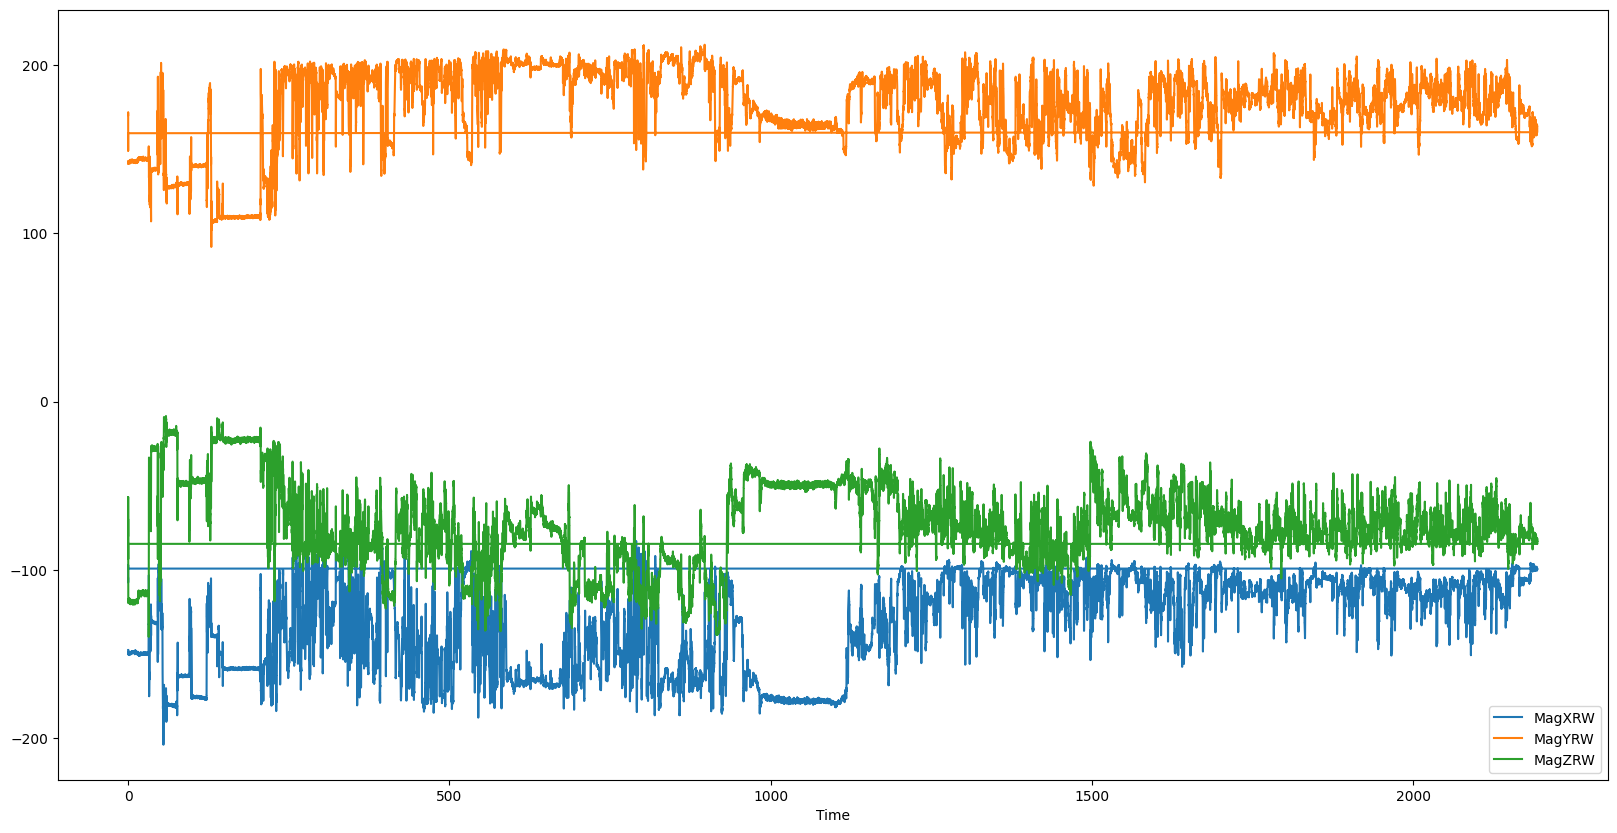

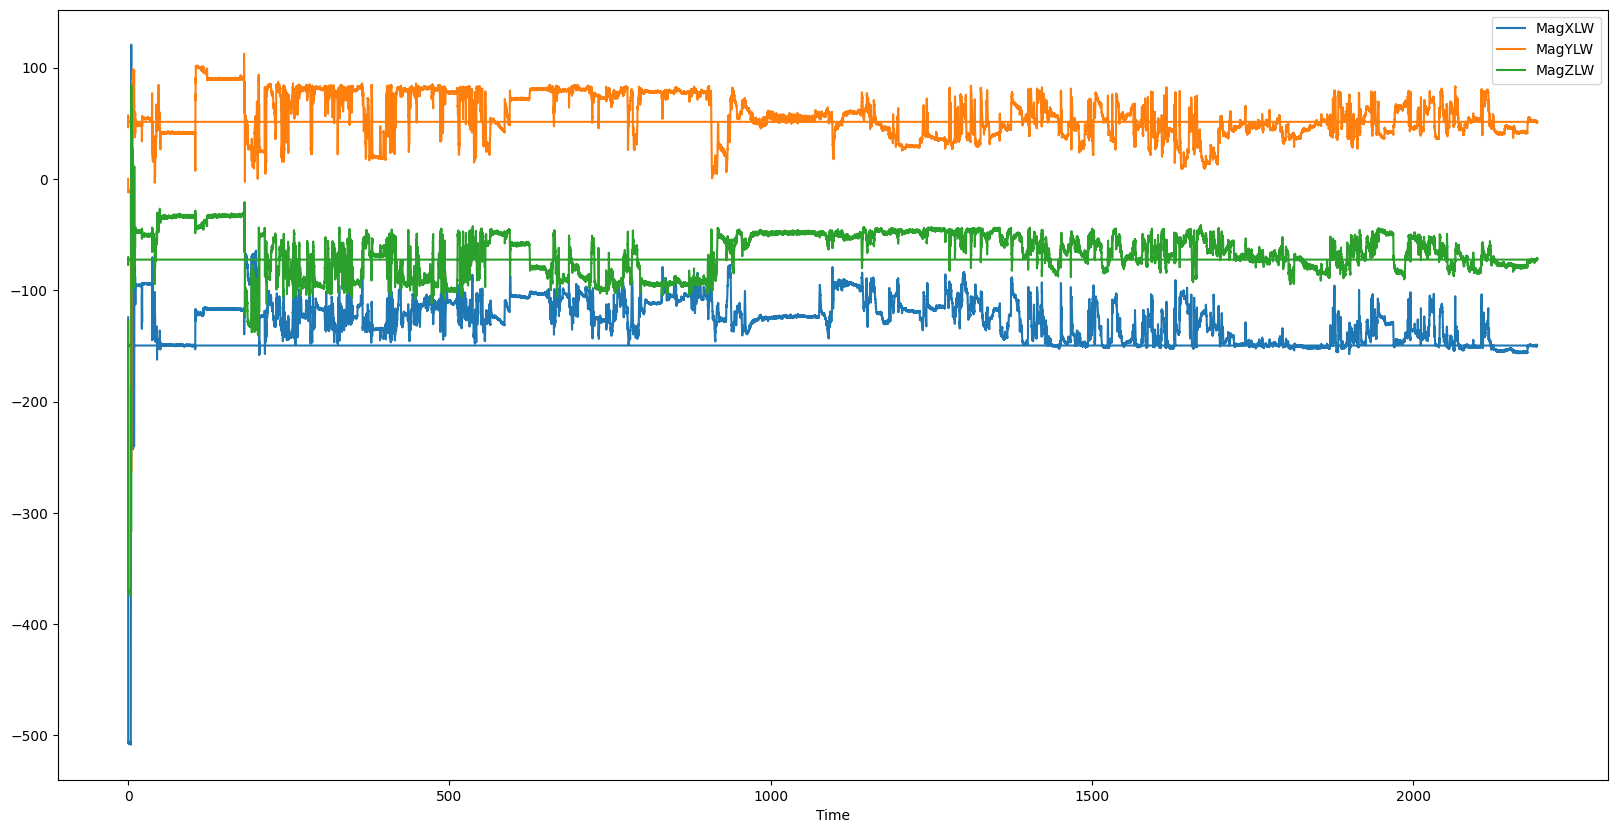

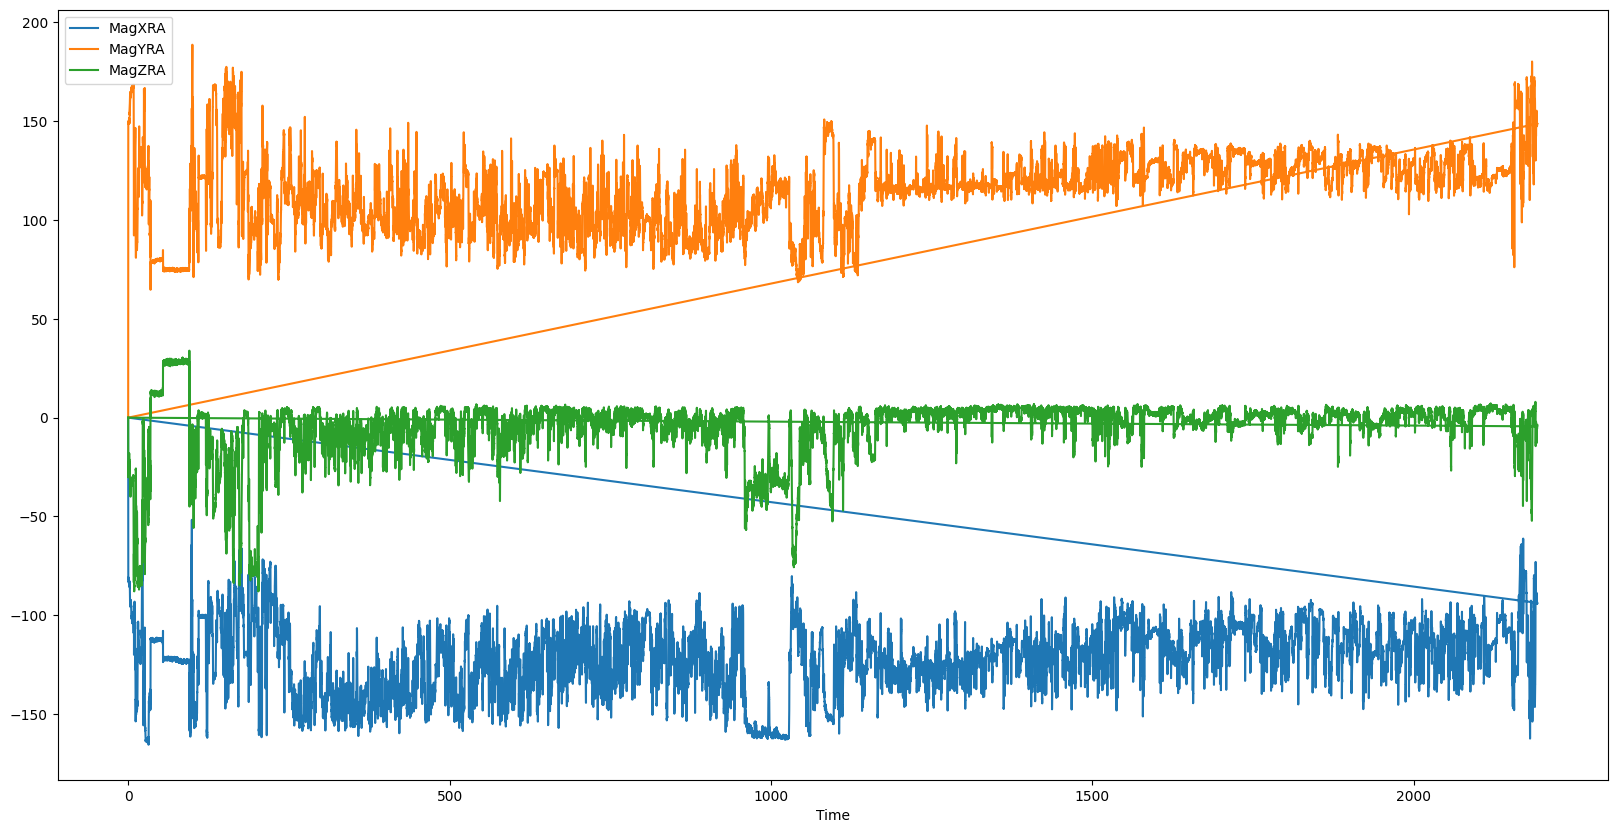

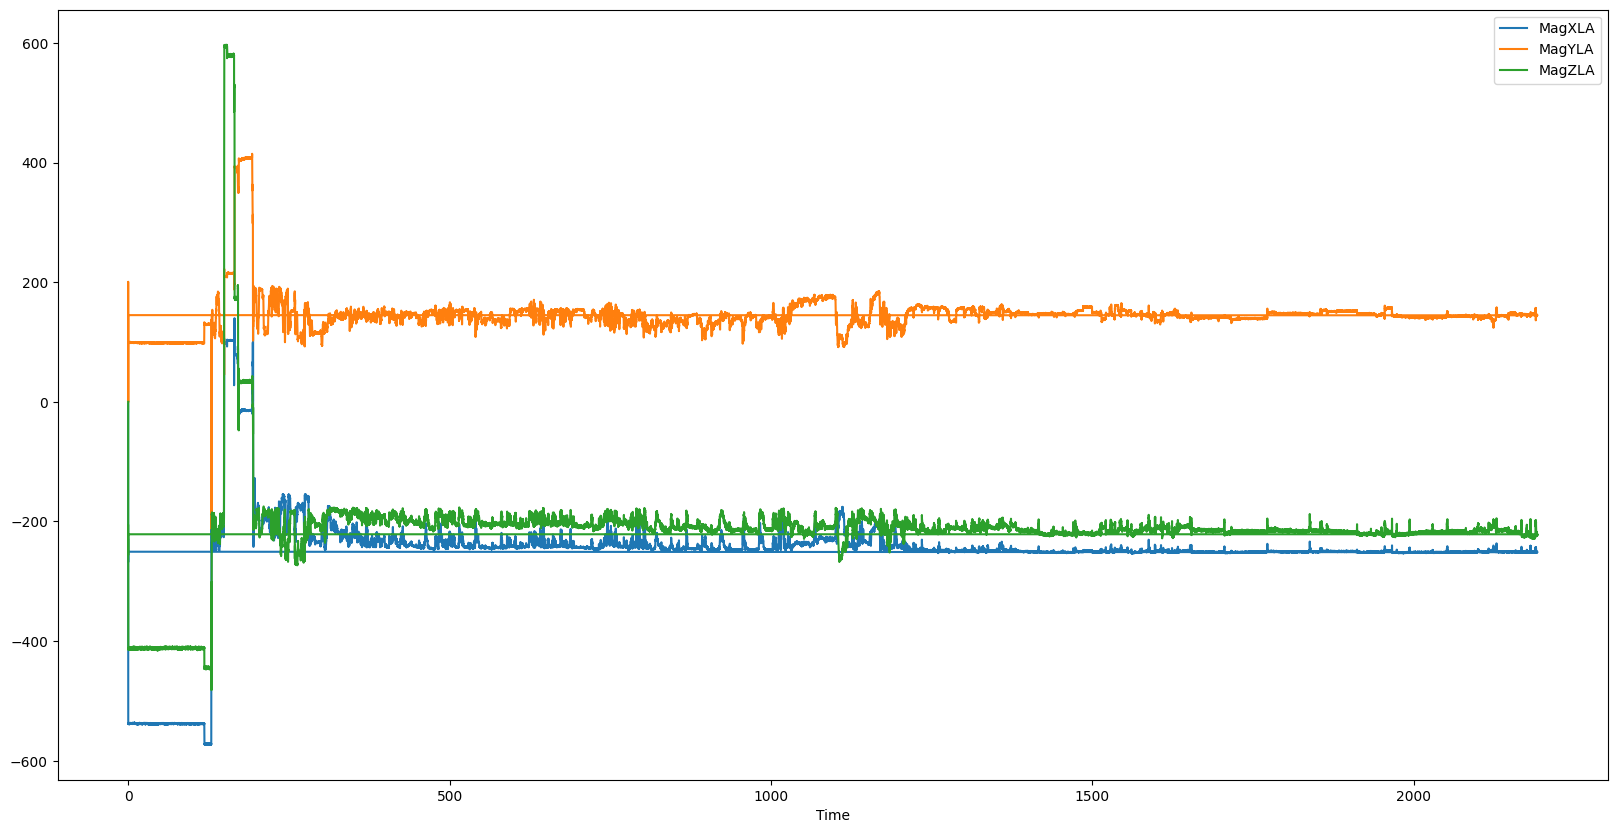

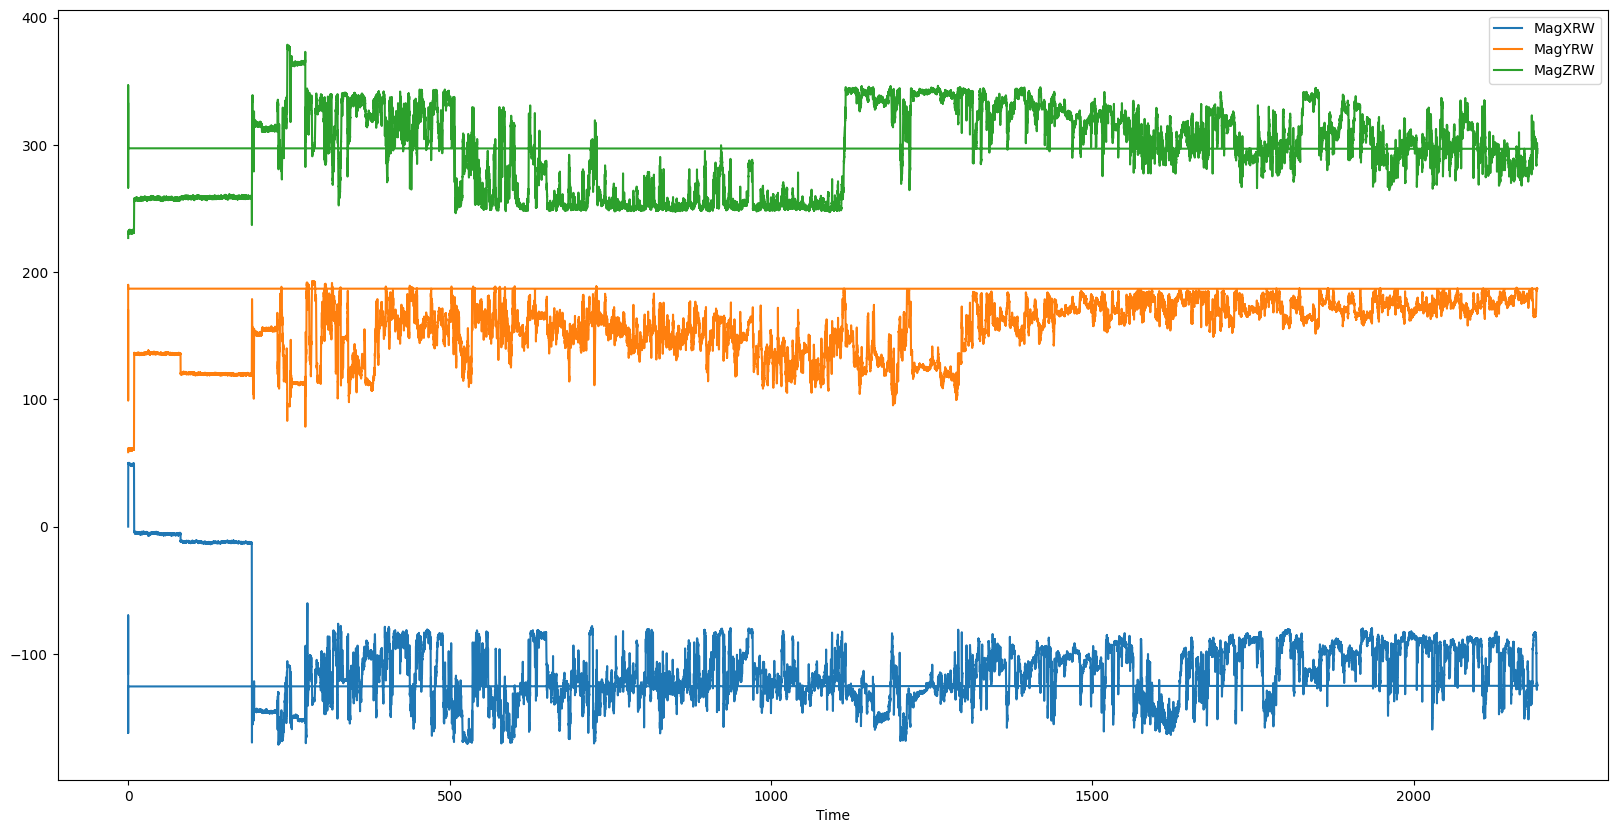

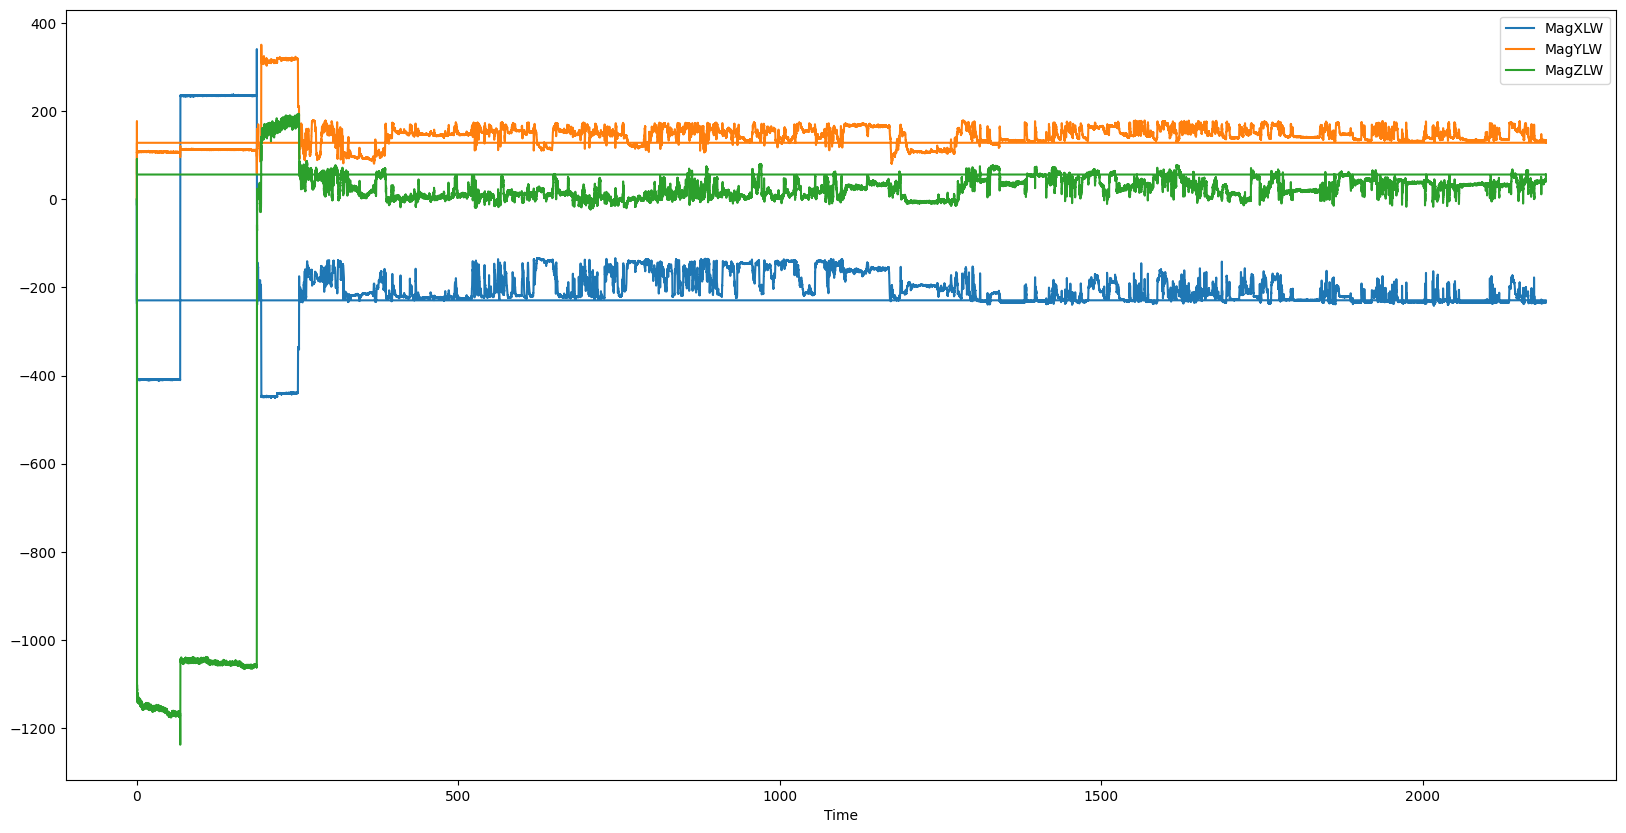

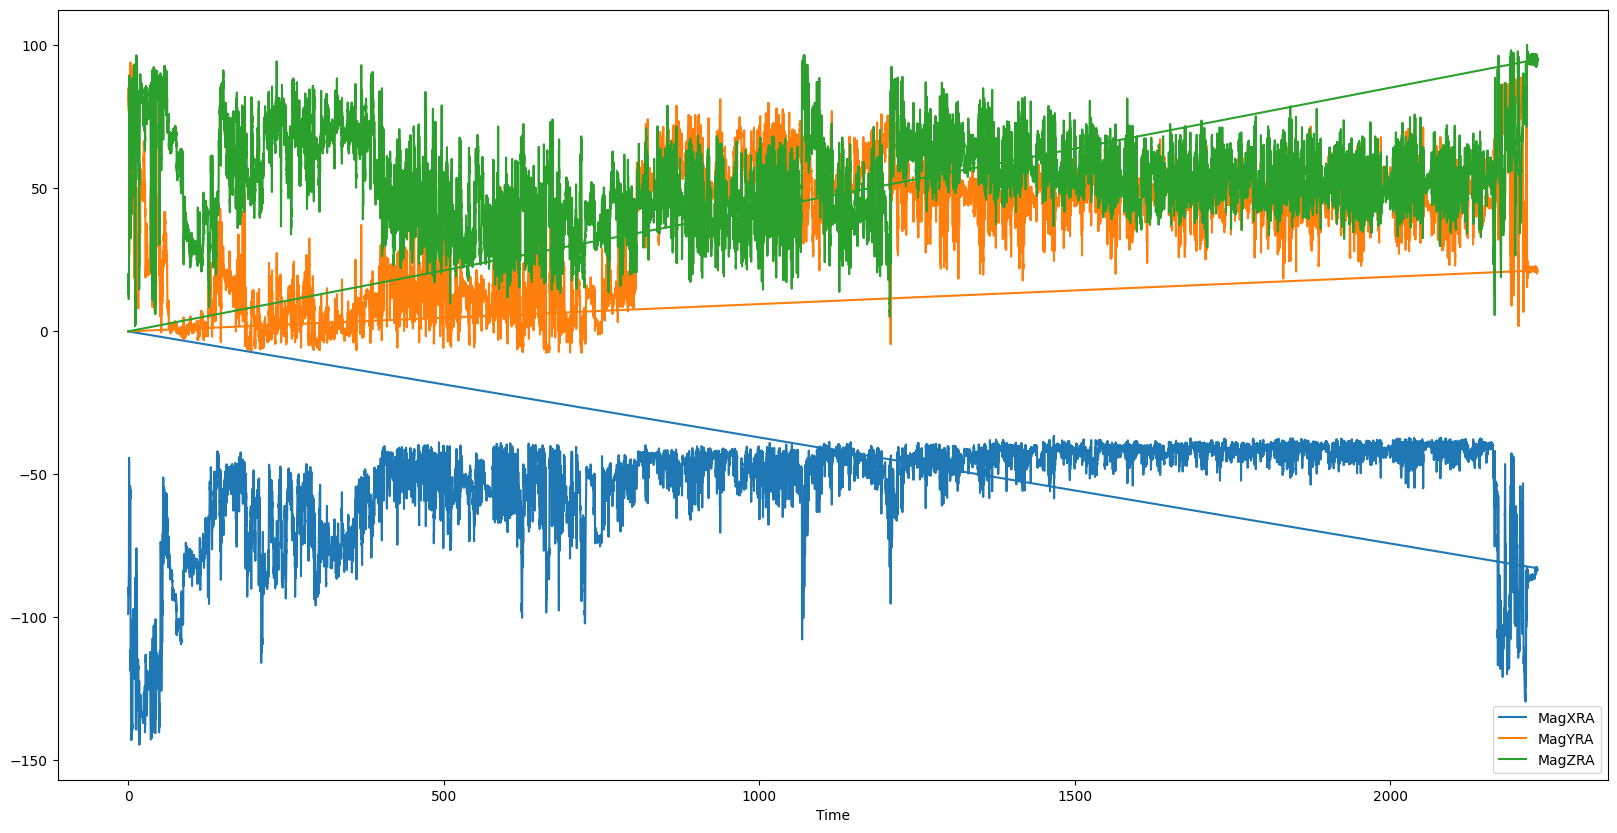

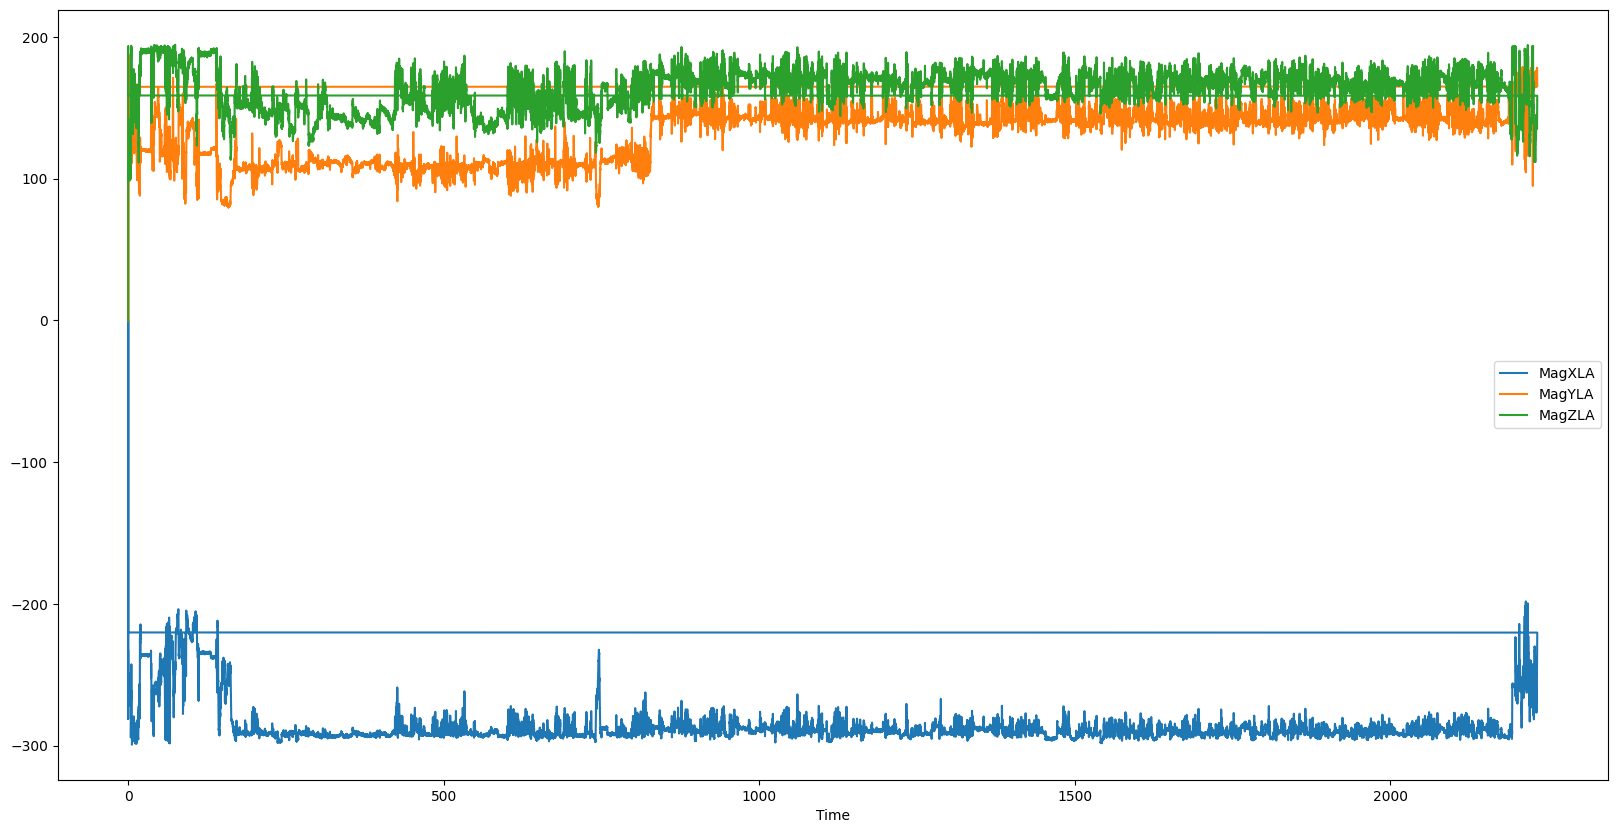

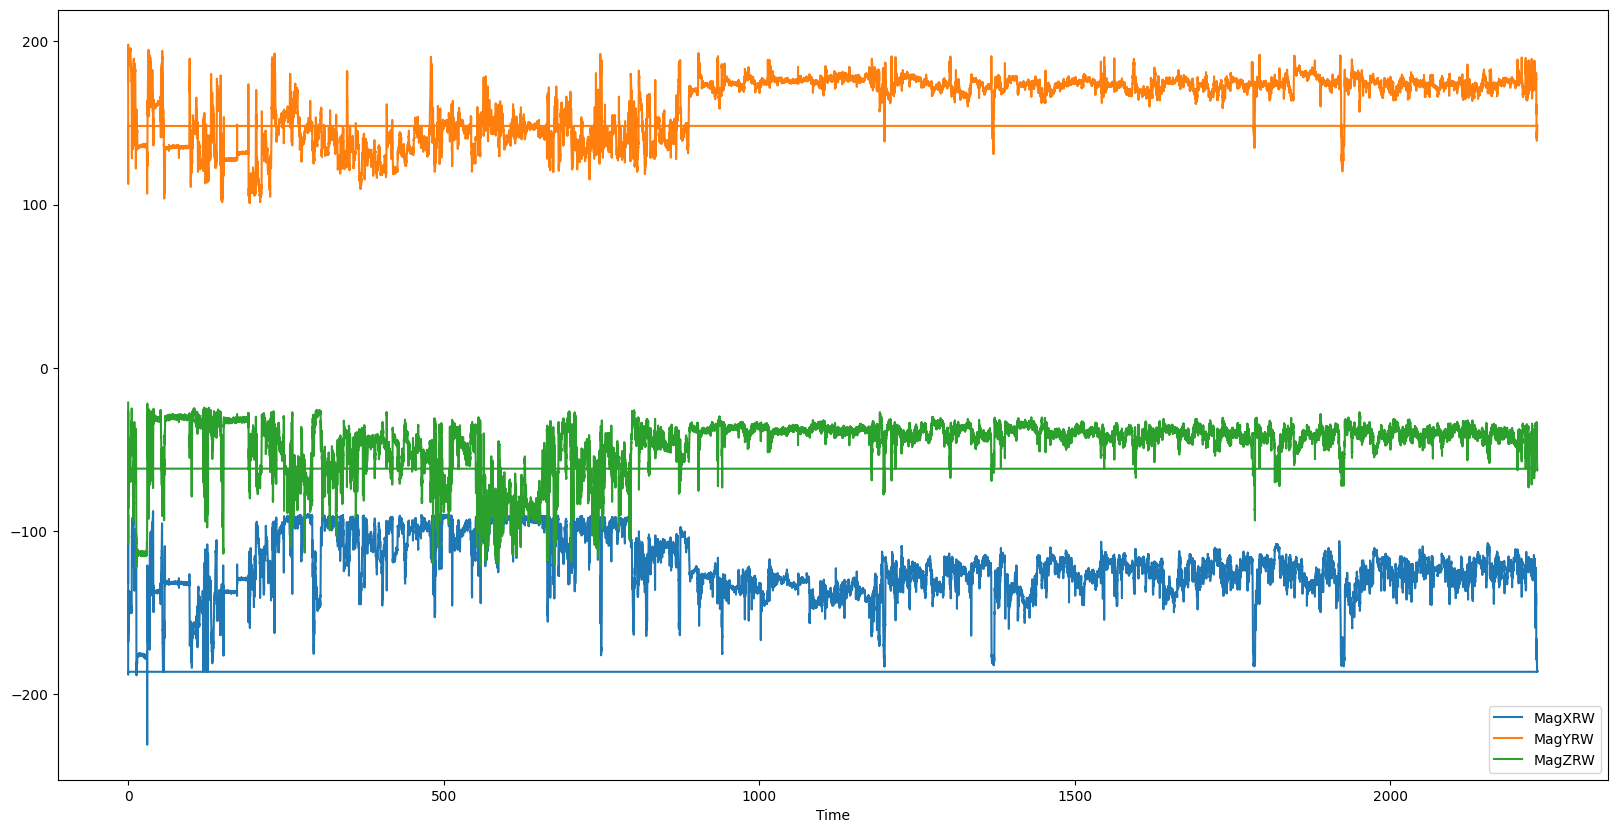

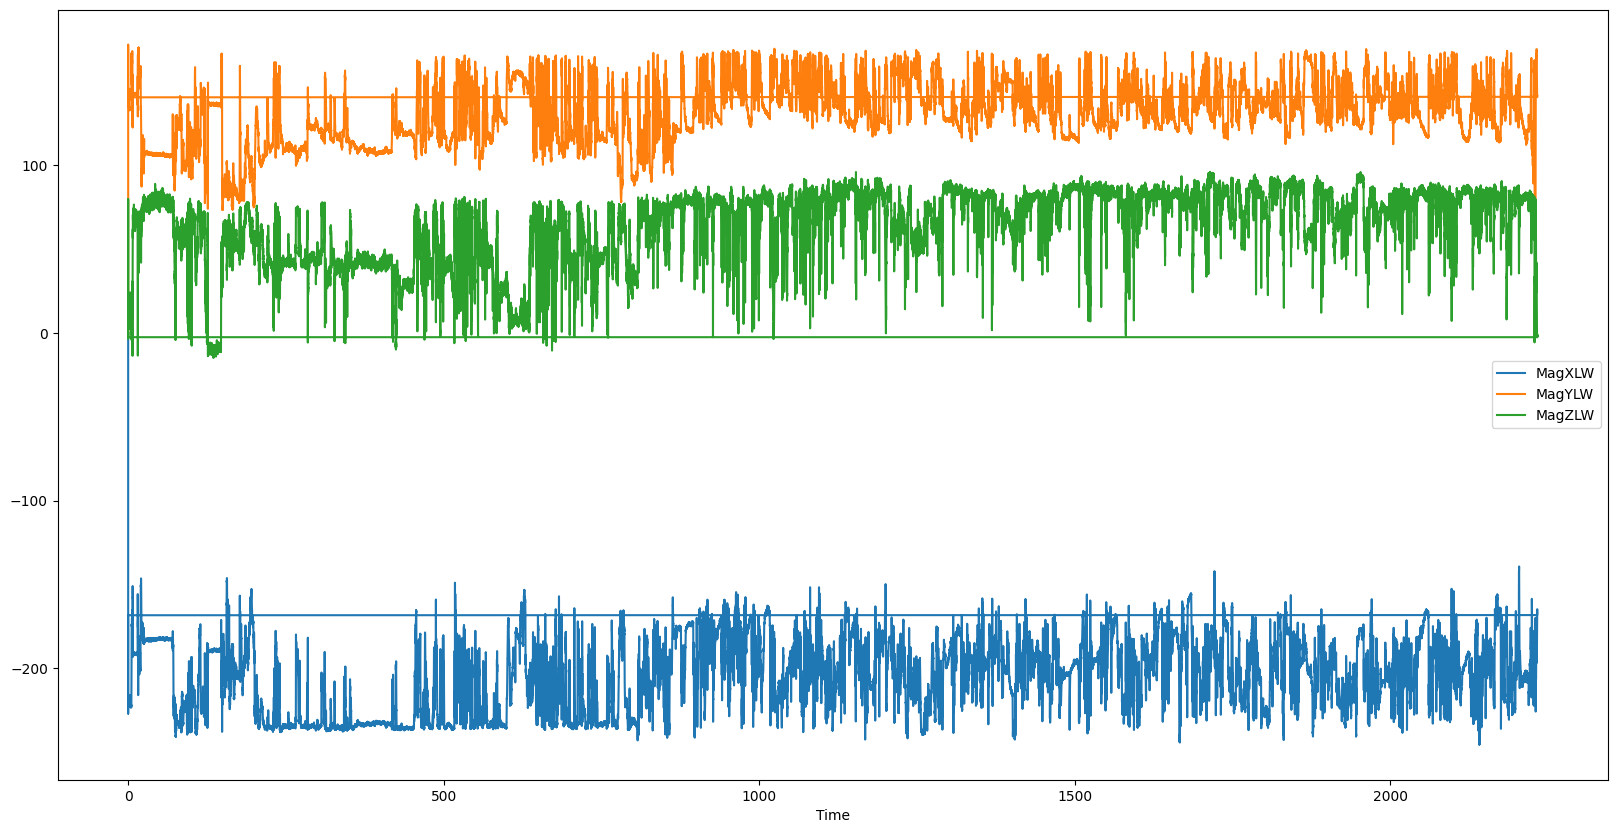

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# For each ID in the label file, find the corresponding file in the data folder
# Iterate through trials

# Initialise empty data structure to hold all sensor data for each trial
# Each trial is in the form of a dataframe

X = [] # List of dataframes



for index, row in label_df.iterrows():
    try:
        print("processing instance", index)
        trial_id = row["ID"]
        infant_id = row["code"]
        if trial_id < 10:
            addedZero = '00'
        elif row['ID'] < 100:
            addedZero = '0'
        else:
            addedZero = ''

        # Access sensor data files
        trial_folder = '../Data/wax/p' + addedZero + str(trial_id)

        # Access sensor data files
        ra_df = pd.read_csv(trial_folder + "/RA.csv")
        la_df = pd.read_csv(trial_folder + "/LA.csv")
        rw_df = pd.read_csv(trial_folder + "/RW.csv")
        lw_df = pd.read_csv(trial_folder + "/LW.csv")

        # The RA, LA, RW, LW files need to be combined to form a training instance
        # The label file has clinical annotations for each instance

        # Check if the RA, LA, RW, LW files have the same number of rows
        # If not, we need to truncate the longer files
        ra_rows = ra_df.shape[0]
        la_rows = la_df.shape[0]
        rw_rows = rw_df.shape[0]
        lw_rows = lw_df.shape[0]
        print("RA rows:", ra_rows)
        print("LA rows:", la_rows)
        print("RW rows:", rw_rows)
        print("LW rows:", lw_rows)

        # Find the minimum number of rows
        min_rows = min(ra_rows, la_rows, rw_rows, lw_rows)
        print("Minimum number of rows:", min_rows)

        # Truncate the longer files
        ra_df = ra_df[:min_rows]
        la_df = la_df[:min_rows]
        rw_df = rw_df[:min_rows]
        lw_df = lw_df[:min_rows]

        # Check if first column is the same for each df
        ra_col1 = ra_df.columns[0]
        la_col1 = la_df.columns[0]
        rw_col1 = rw_df.columns[0]
        lw_col1 = lw_df.columns[0]
        if ra_col1 == la_col1 == rw_col1 == lw_col1:
            print("First column is the same for each df")
        
        # Remove first column of la, rw, lw dfs
        la_df = la_df.drop(columns=[la_col1])
        rw_df = rw_df.drop(columns=[rw_col1])
        lw_df = lw_df.drop(columns=[lw_col1])

        # Combine the files
        combined_df = pd.concat([ra_df, la_df, rw_df, lw_df], axis=1)
        
        # In each CSV the columns are not labelled correctly. For each CSV we want the columns to be
            # AccX, AccY, AccZ, GyrX, GyrY, GyrZ, MagX, MagY, MagZ
            # With each column having the limb name as a prefix
        
        # Rename columns
        combined_df.columns = ['Time', 'AccXRA', 'AccYRA', 'AccZRA', 'GyrXRA', 'GyrYRA', 'GyrZRA', 'MagXRA', 'MagYRA', 'MagZRA',
                               'AccXLA', 'AccYLA', 'AccZLA', 'GyrXLA', 'GyrYLA', 'GyrZLA', 'MagXLA', 'MagYLA', 'MagZLA',
                               'AccXRW', 'AccYRW', 'AccZRW', 'GyrXRW', 'GyrYRW', 'GyrZRW', 'MagXRW', 'MagYRW', 'MagZRW',
                               'AccXLW', 'AccYLW', 'AccZLW', 'GyrXLW', 'GyrYLW', 'GyrZLW', 'MagXLW', 'MagYLW', 'MagZLW']
        
        print(combined_df.head())

        # Visualise the data
        # Make the plots bigger
        plt.rcParams['figure.figsize'] = [20, 10]
        #combined_df.plot(x='Time', y=['AccXRA', 'AccYRA', 'AccZRA'])
        #combined_df.plot(x='Time', y=['AccXLA', 'AccYLA', 'AccZLA'])
        #combined_df.plot(x='Time', y=['AccXRW', 'AccYRW', 'AccZRW'])
        #combined_df.plot(x='Time', y=['AccXLW', 'AccYLW', 'AccZLW'])
        #combined_df.plot(x='Time', y=['GyrXRA', 'GyrYRA', 'GyrZRA'])
        #combined_df.plot(x='Time', y=['GyrXLA', 'GyrYLA', 'GyrZLA'])
        #combined_df.plot(x='Time', y=['GyrXRW', 'GyrYRW', 'GyrZRW'])
        #combined_df.plot(x='Time', y=['GyrXLW', 'GyrYLW', 'GyrZLW'])
        combined_df.plot(x='Time', y=['MagXRA', 'MagYRA', 'MagZRA'])
        combined_df.plot(x='Time', y=['MagXLA', 'MagYLA', 'MagZLA'])
        combined_df.plot(x='Time', y=['MagXRW', 'MagYRW', 'MagZRW'])
        combined_df.plot(x='Time', y=['MagXLW', 'MagYLW', 'MagZLW'])

        # Each combined_df is a training instance
        # Each training instance has a label
        # The label is in the label_df
        # The label_df has a column called 'code'
        # The 'code' column has the infant ID
        # The infant ID is the folder name for the training instance
        # The training instance is the combined_df
        
        X.append(combined_df)

        

    except FileNotFoundError:
        print("File not found for instance", index)
    

    if index>10:
        break

print(X)
